### Ejemplo

Se requiere desarrollar una clase llamada AnalisisECG que permita cargar y visualizar datos de señales de electrocardiograma (ECG) almacenadas en archivos .mat. El propósito de esta clase es facilitar el análisis y la representación gráfica de las señales de ECG de un sujeto.

La clase AnalisisECG contendrá los siguientes métodos:

**cargar_datos(archivo)**: Método que carga los datos de señales de ECG desde un archivo .mat especificado.

**visualizar_todo()**: Método que genera un gráfico para mostrar todas las señales de ECG de cada electrodo en subplots separados.

**visualizar_dos(electrodos)**: Método que genera un gráfico para mostrar las señales de ECG de los electrodos seleccionados en un mismo subplot.

La clase deberá utilizar las bibliotecas numpy, matplotlib.pyplot y scipy.io.loadmat para el procesamiento y la visualización de los datos.

Para utilizar la clase, se seguirán los siguientes pasos:

- Crear una instancia de la clase AnalisisECG.
- Cargar los datos de señales de ECG desde un archivo .mat utilizando el método cargar_datos.
- Visualizar todas las señales de ECG de cada electrodo utilizando el método visualizar_todo.
- Visualizar las señales de ECG de los electrodos seleccionados en un mismo gráfico utilizando el método visualizar_dos.

In [1]:
#libreria de entrada salida de datos
import scipy.io as sio

#graficar
import matplotlib.pyplot as plt

In [2]:
path = r"Unidad 2\r01_edfm (1).mat"
mat_contents = sio.loadmat(path) 
print(f'La variable cargada es del tipo: {type(mat_contents)}') 
print(f'las llaves son: {mat_contents.keys()}') 

La variable cargada es del tipo: <class 'dict'>
las llaves son: dict_keys(['__header__', '__version__', '__globals__', 'val'])


In [3]:
mat_contents[list(mat_contents.keys())[-1]]

array([[  287,   266,   247, ...,   510,   508,   509],
       [  -89,  -140,  -188, ...,    89,    89,    90],
       [  133,   126,   120, ...,     1,     4,     6],
       [  220,   217,   212, ...,    14,    20,    21],
       [  325,   353,   375, ...,    -4,    -1,     5],
       [12331, 12331, 12331, ...,     0,     0,     0]], dtype=int16)

In [4]:
ultima_clave = list(mat_contents.keys())

ultima_clave[-1]

'val'

In [5]:
senal = mat_contents['val'] 
print("dimensión: ",senal.ndim) 
print("Forma: ",senal.shape) 

dimensión:  2
Forma:  (6, 300000)


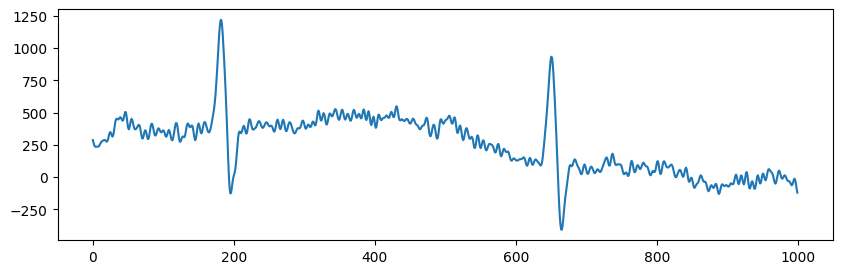

In [6]:
fig = plt.figure(figsize=(10,3))
plt.plot(senal[0,0:1000])
plt.show()

Datos cargados exitosamente.


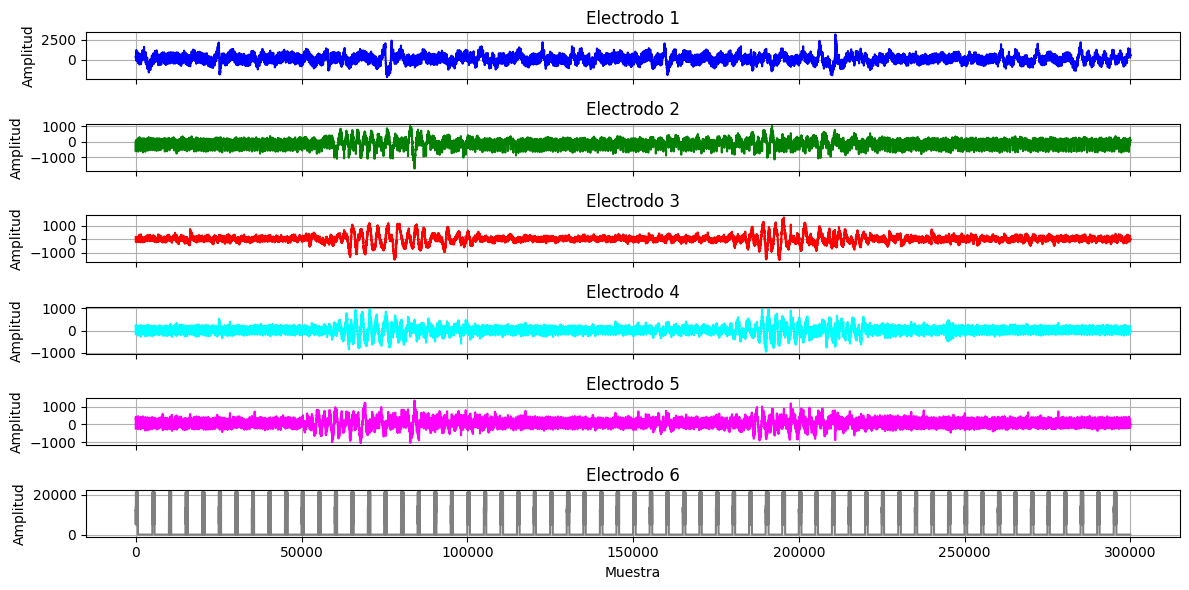

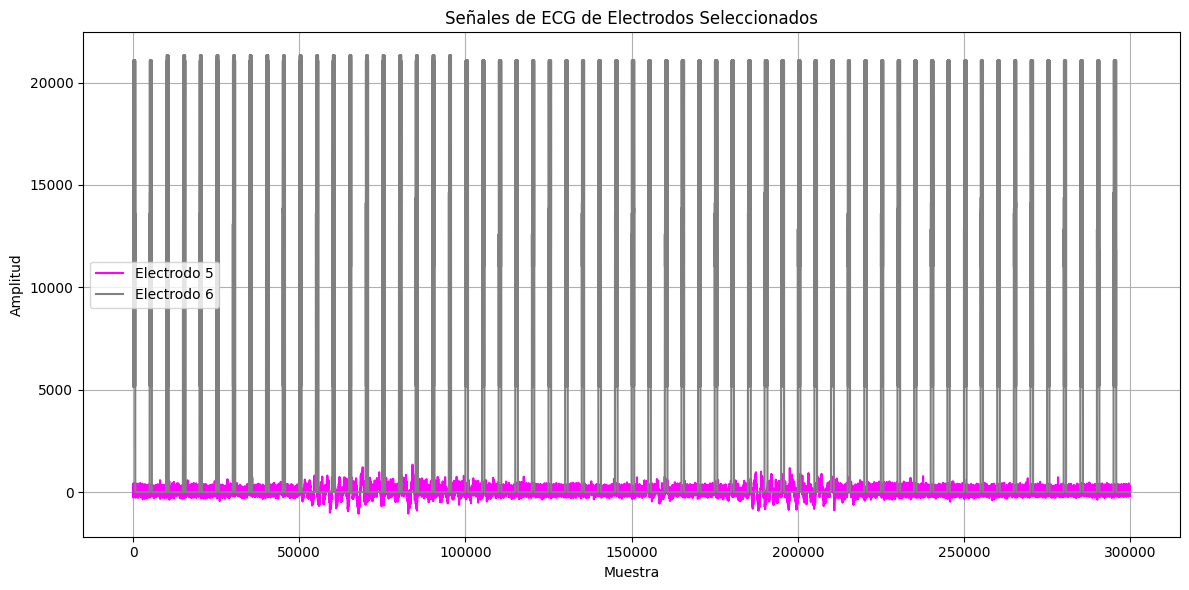

In [19]:
import matplotlib.pyplot as plt
import scipy.io as sio

class AnalisisECG:
    def __init__(self):
        self.data=[]
        self.colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'gray']
        self.num_electrodos=None
    
    def cargar_datos(self, archivo):
        self.data = sio.loadmat(archivo)
        self.data = self.data[list(self.data.keys())[-1]]
        self.num_electrodos = self.data.shape[0]
        print("Datos cargados exitosamente.")
    
    def visualizar_todo(self):
        
        # Crear subplots para mostrar las señales de ECG de cada electrodo
        fig, axs = plt.subplots(self.num_electrodos, 1, figsize=(12, 6), sharex=True)
        
        for i in range(self.num_electrodos):
            axs[i].plot(self.data[i, :], color=self.colores[i])  # Asignar color
            axs[i].set_title(f'Electrodo {i+1}')
            axs[i].set_ylabel('Amplitud')
            axs[i].grid(True)
        
        axs[-1].set_xlabel('Muestra')
        
        plt.tight_layout()
        plt.show()

    def visualizar_dos(self,electrodos):
        self.num_electrodos = self.data.shape[0]
        self.electrodos=electrodos
        
        # Crear gráfico para mostrar las señales de ECG de dos electrodos
        fig, axs = plt.subplots( figsize=(12, 6), sharex=True)

        for i in self.electrodos:
            plt.plot(self.data[i-1, :], color=self.colores[i-1], label=f'Electrodo {i}')
        
        plt.title('Señales de ECG de Electrodos Seleccionados')
        plt.xlabel('Muestra')
        plt.ylabel('Amplitud')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
# Uso del programa
analisis = AnalisisECG()
analisis.cargar_datos(r'Unidad 2\r01_edfm (1).mat')
analisis.visualizar_todo()
analisis.visualizar_dos(electrodos=[5, 6])